In [ ]:
!pip install pyagrum


## Bayesian network for dialogue management:

The variables in the network are:

* **User intent**: It can take on values "information request," "task completion," or "opinion expression."

* **User preference**: It can take on values "direct answer," 
"clarification question," or "confirmation request."

* **Dialogue context**:  It can take on values "topic new," "previous topic," 

* **Robot understanding**: It can take on values "question," "statement," or "request."

* **Robot response**: This variable represents the possible responses that the robot can make to the user's utterance, 
such as providing information, asking for clarification, or requesting confirmation. It can take on values 
"provide information," "ask for clarification," or "request confirmation."


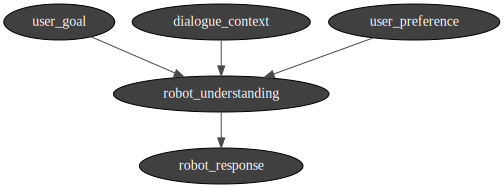

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


# Create a Bayesian network object
bn = gum.BayesNet('Dialogue Management')

# Add the nodes to the network
user_goal = bn.add(gum.LabelizedVariable('user_goal', 'User Goal', ['info', 'opinion', 'task']))
user_preference = bn.add(gum.LabelizedVariable('user_preference', 'User Preference', ['direct answer', 'clarification', 'confirmation']))
dialogue_context = bn.add(gum.LabelizedVariable('dialogue_context', 'Dialogue Context', ['new topic', 'previous topic']))
robot_understanding = bn.add(gum.LabelizedVariable('robot_understanding', 'Robot Understanding', ['question', 'statement', 'request']))
robot_response = bn.add(gum.LabelizedVariable('robot_response', 'Robot Response', ['provide information', 'ask clarification', 'request confirmation']))

# Define the conditional probability distributions for each node
bn.cpt(user_goal).fillWith([0.3, 0.4, 0.3])
bn.cpt(user_preference).fillWith([0.4, 0.3, 0.3])
bn.cpt(dialogue_context).fillWith([0.4, 0.6])
bn.cpt(robot_understanding)[{'user_preference': 'direct answer'}] = [0.4, 0.3, 0.3]
bn.cpt(robot_understanding)[{'user_preference': 'clarification'}] = [0.2, 0.5, 0.3]
bn.cpt(robot_understanding)[{'user_preference': 'confirmation'}] = [0.2, 0.3, 0.5]
bn.cpt(robot_response)[{'robot_understanding': 'question'}] = [0.5, 0.2, 0.3]
bn.cpt(robot_response)[{'robot_understanding': 'statement'}] = [0.3, 0.5, 0.2]
bn.cpt(robot_response)[{'robot_understanding': 'request'}] = [0.2, 0.3, 0.5]
bn.cpt(robot_understanding)[{'user_goal': 'info'}] = [0.4, 0.3, 0.3]
bn.cpt(robot_understanding)[{'user_goal': 'opinion'}] = [0.2, 0.5, 0.3]
bn.cpt(robot_understanding)[{'user_goal': 'task'}] = [0.2, 0.3, 0.5]
bn.cpt(robot_understanding)[{'dialogue_context': 'new topic'}] = [0.4, 0.3, 0.3]
bn.cpt(robot_understanding)[{'dialogue_context': 'previous topic'}] = [0.2, 0.5, 0.3]
bn.addArc(user_preference,robot_understanding)
bn.addArc(dialogue_context,robot_understanding)
bn.addArc(user_goal,robot_understanding)
bn.addArc(robot_understanding,robot_response)


gnb.showBN(bn,size='30')


In [4]:

# Observe the values of the user_goal and dialogue_context nodes
# bn.setEvidence({'user_goal': 0, 'dialogue_context': 0})

# Infer the posterior probabilities of the robot_understanding and robot_response nodes
ie = gum.LazyPropagation(bn)

# Observe the values of the user_goal and dialogue_context nodes
ie.setEvidence({'user_goal': 'info', 'dialogue_context': 'new topic'})

ie.makeInference()

robot_understanding_posterior = ie.posterior(robot_understanding)
robot_response_posterior = ie.posterior(robot_response)
print(list(robot_understanding_posterior.findAll(user_goal)))
# print(robot_understanding_posterior.toarray())
# Select the response with the highest probability as the robot's utterance
robot_response = robot_response_posterior.toarray().argmax()

print('Robot response: {}'.format(robot_response))

[{'robot_understanding': 1}, {'robot_understanding': 2}]
Robot response: 2


--- 
End of exercise

---

## Test code

In [5]:
import pyAgrum.lib.notebook as gnb

# the next lines control the visualisation of proba as fraction
gum.config['notebook','potential_with_fraction']=True
gum.config['notebook', 'potential_fraction_with_latex']=True
gum.config['notebook', 'potential_fraction_limit']=100


In [6]:
print(bn.cpt("robot_understanding"))



                    ||  robot_understanding        |
user_p|dialog|user_g||question |statement|request  |
------|------|------||---------|---------|---------|
direct|new to|info  || 0.2000  | 0.5000  | 0.3000  |
clarif|new to|info  || 0.0000  | 0.0000  | 0.0000  |
confir|new to|info  || 0.0000  | 0.0000  | 0.0000  |
direct|previo|info  || 0.0000  | 0.0000  | 0.0000  |
clarif|previo|info  || 0.0000  | 0.0000  | 0.0000  |
confir|previo|info  || 0.0000  | 0.0000  | 0.0000  |
[...6 more line(s) ...]
direct|new to|task  || 0.0000  | 0.0000  | 0.0000  |
clarif|new to|task  || 0.0000  | 0.0000  | 0.0000  |
confir|new to|task  || 0.0000  | 0.0000  | 0.0000  |
direct|previo|task  || 0.0000  | 0.0000  | 0.0000  |
clarif|previo|task  || 0.0000  | 0.0000  | 0.0000  |
confir|previo|task  || 0.0000  | 0.0000  | 0.0000  |



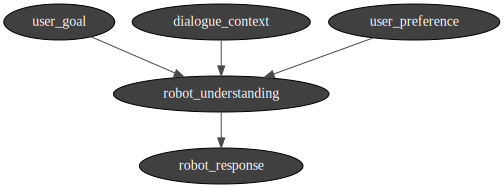

In [8]:
gnb.showBN(bn,size='30')


In [9]:
print(bn.cpt("robot_understanding"))



                    ||  robot_understanding        |
user_p|dialog|user_g||question |statement|request  |
------|------|------||---------|---------|---------|
direct|new to|info  || 0.2000  | 0.5000  | 0.3000  |
clarif|new to|info  || 0.0000  | 0.0000  | 0.0000  |
confir|new to|info  || 0.0000  | 0.0000  | 0.0000  |
direct|previo|info  || 0.0000  | 0.0000  | 0.0000  |
clarif|previo|info  || 0.0000  | 0.0000  | 0.0000  |
confir|previo|info  || 0.0000  | 0.0000  | 0.0000  |
[...6 more line(s) ...]
direct|new to|task  || 0.0000  | 0.0000  | 0.0000  |
clarif|new to|task  || 0.0000  | 0.0000  | 0.0000  |
confir|new to|task  || 0.0000  | 0.0000  | 0.0000  |
direct|previo|task  || 0.0000  | 0.0000  | 0.0000  |
clarif|previo|task  || 0.0000  | 0.0000  | 0.0000  |
confir|previo|task  || 0.0000  | 0.0000  | 0.0000  |



In [10]:
bn=gum.fastBN("c->r->w<-s<-c")
bn

(pyAgrum.BayesNet<double>@0x38f77c0) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [12]:
!pip install pymc3
 

  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached arviz-0.15.1-py3-none-any.whl (1.6 MB)
  Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached scipy-1.7.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.3 MB)
  Using cached semver-3.0.2-py3-none-any.whl (17 kB)
Processing /home/akhilan/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c/Theano_PyMC-1.1.2-py3-none-any.whl
  Using cached xarray-2023.1.0-py3-none-any.whl (973 kB)
  Using cached h5netcdf-1.1.0-py2.py3-none-any.whl (26 kB)
  Using cached xarray_einstats-0.5.1-py3-none-any.whl (28 kB)
  Using cached h5py-3.10.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
ERROR: arviz 0.15.1 has requirement scipy>=1.8.0, but you'll have scipy 1.7.3 which is incompatible.
  Atte

In [13]:
import pymc3 as pm

# Define the Bayesian network structure
with pm.Model() as model:
    user_goal = pm.Categorical('user_goal', p=[0.3, 0.4, 0.3], shape=1)
    user_preference = pm.Categorical('user_preference', p=[0.4, 0.3, 0.3], shape=1)
    dialogue_context = pm.Categorical('dialogue_context', p=[0.2, 0.6, 0.2], shape=1)
    robot_understanding = pm.Categorical('robot_understanding', p=[0.5, 0.3, 0.2], shape=1)
    robot_response = pm.Categorical('robot_response', p=[0.3, 0.5, 0.2], shape=1)

    # Define the conditional probability distributions
    p_user_goal_given_context = pm.math.switch(pm.math.eq(dialogue_context, 0), [0.6, 0.2, 0.2], [0.2, 0.3, 0.5])
    p_user_preference_given_goal = pm.math.switch(pm.math.eq(user_goal, 0), [0.5, 0.2, 0.3], [0.2, 0.4, 0.4])
    p_robot_understanding_given_user = pm.math.switch(pm.math.eq(user_preference, 0), [0.4, 0.3, 0.3], [0.2, 0.5, 0.3])
    p_robot_response_given_understanding = pm.math.switch(pm.math.eq(robot_understanding, 0), [0.5, 0.2, 0.3], [0.3, 0.5, 0.2])

    # Define the joint probability distribution
    p_joint = pm.Deterministic('p_joint', p_user_goal_given_context[user_goal] * p_user_preference_given_goal[user_preference] * \
                                                pm.math.switch(pm.math.eq(dialogue_context, 0), 1, p_robot_understanding_given_user[user_preference]) * \
                                                p_robot_response_given_understanding[robot_understanding])

    # Observe the values of the user_goal and dialogue_context nodes
    observed_values = {'user_goal': 0, 'dialogue_context': 0}

    # Infer the posterior probabilities of the robot_understanding and robot_response nodes
    inference = pm.inference.sampling.sample_posterior_predictive(model=model, samples=1000, vars=[robot_understanding, robot_response], \
                                                               observed=observed_values)

    # Select the response with the highest probability as the robot's utterance
    robot_response = pm.stats.mode(inference['robot_response'])[0]


AttributeError: module 'pymc3.variational.inference' has no attribute 'sampling'